Total within-cluster sum of squares:  17.46619760906058


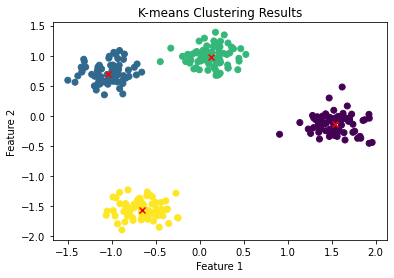

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset with 300 samples and 2 features
data, labels = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

def initialize_centroids(data, k):
    
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def compute_distances(data, centroids):

    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
    return distances

def assign_clusters(distances):

    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):

    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        new_centroids[i] = np.mean(data[clusters == i], axis=0)
    return new_centroids

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, cluster
k = 4

centroids, clusters = k_means(data_scaled, k)


wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within cluster sum of squares: ", wcss)

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()